In [32]:
# Setup code for the notebook
#%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import ipytools
import data_loader
import visualization

# Get images from the video 

In [34]:
folders = data_loader.retrieve_video()

892 images


In [35]:
# Chose a pair of images
i, j = 0, 100
images_name = data_loader.choose_video(folders, [i, j])

# Get Triplets

In [90]:
folders = data_loader.retrieve_triplets()

In [91]:
# Chose a pair of images
d = 2
i = 9
indices = ['1107', '1148']#, '1231']
images_name = data_loader.choose_triplets(folders, d, i, indices)

# Visualize chosen images

Dimension:  (1080, 2560, 1)
Dimension:  (1080, 2560, 1)



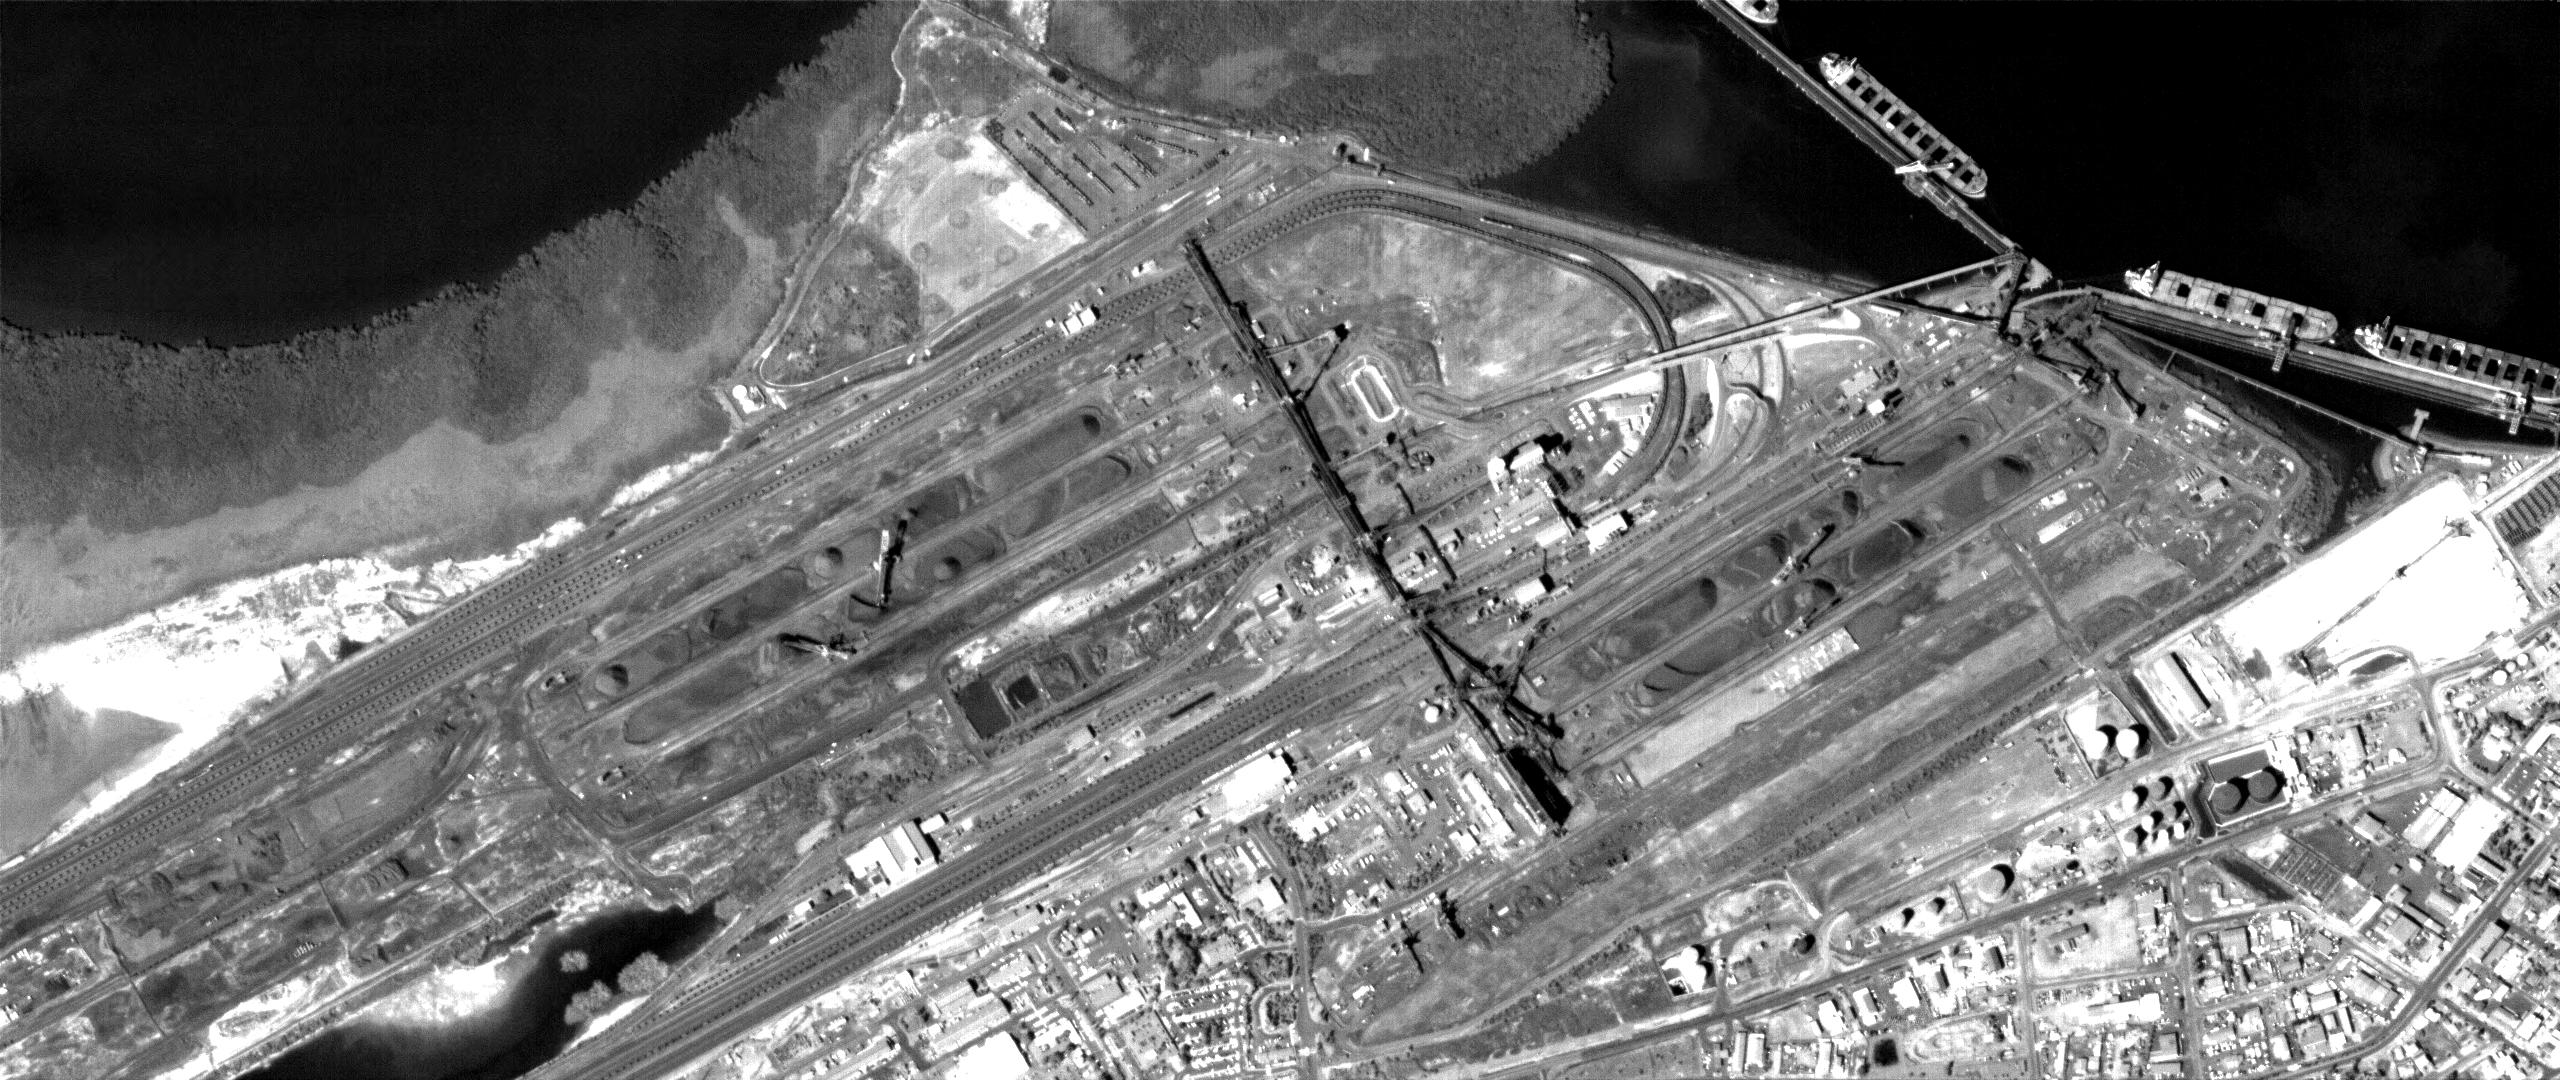
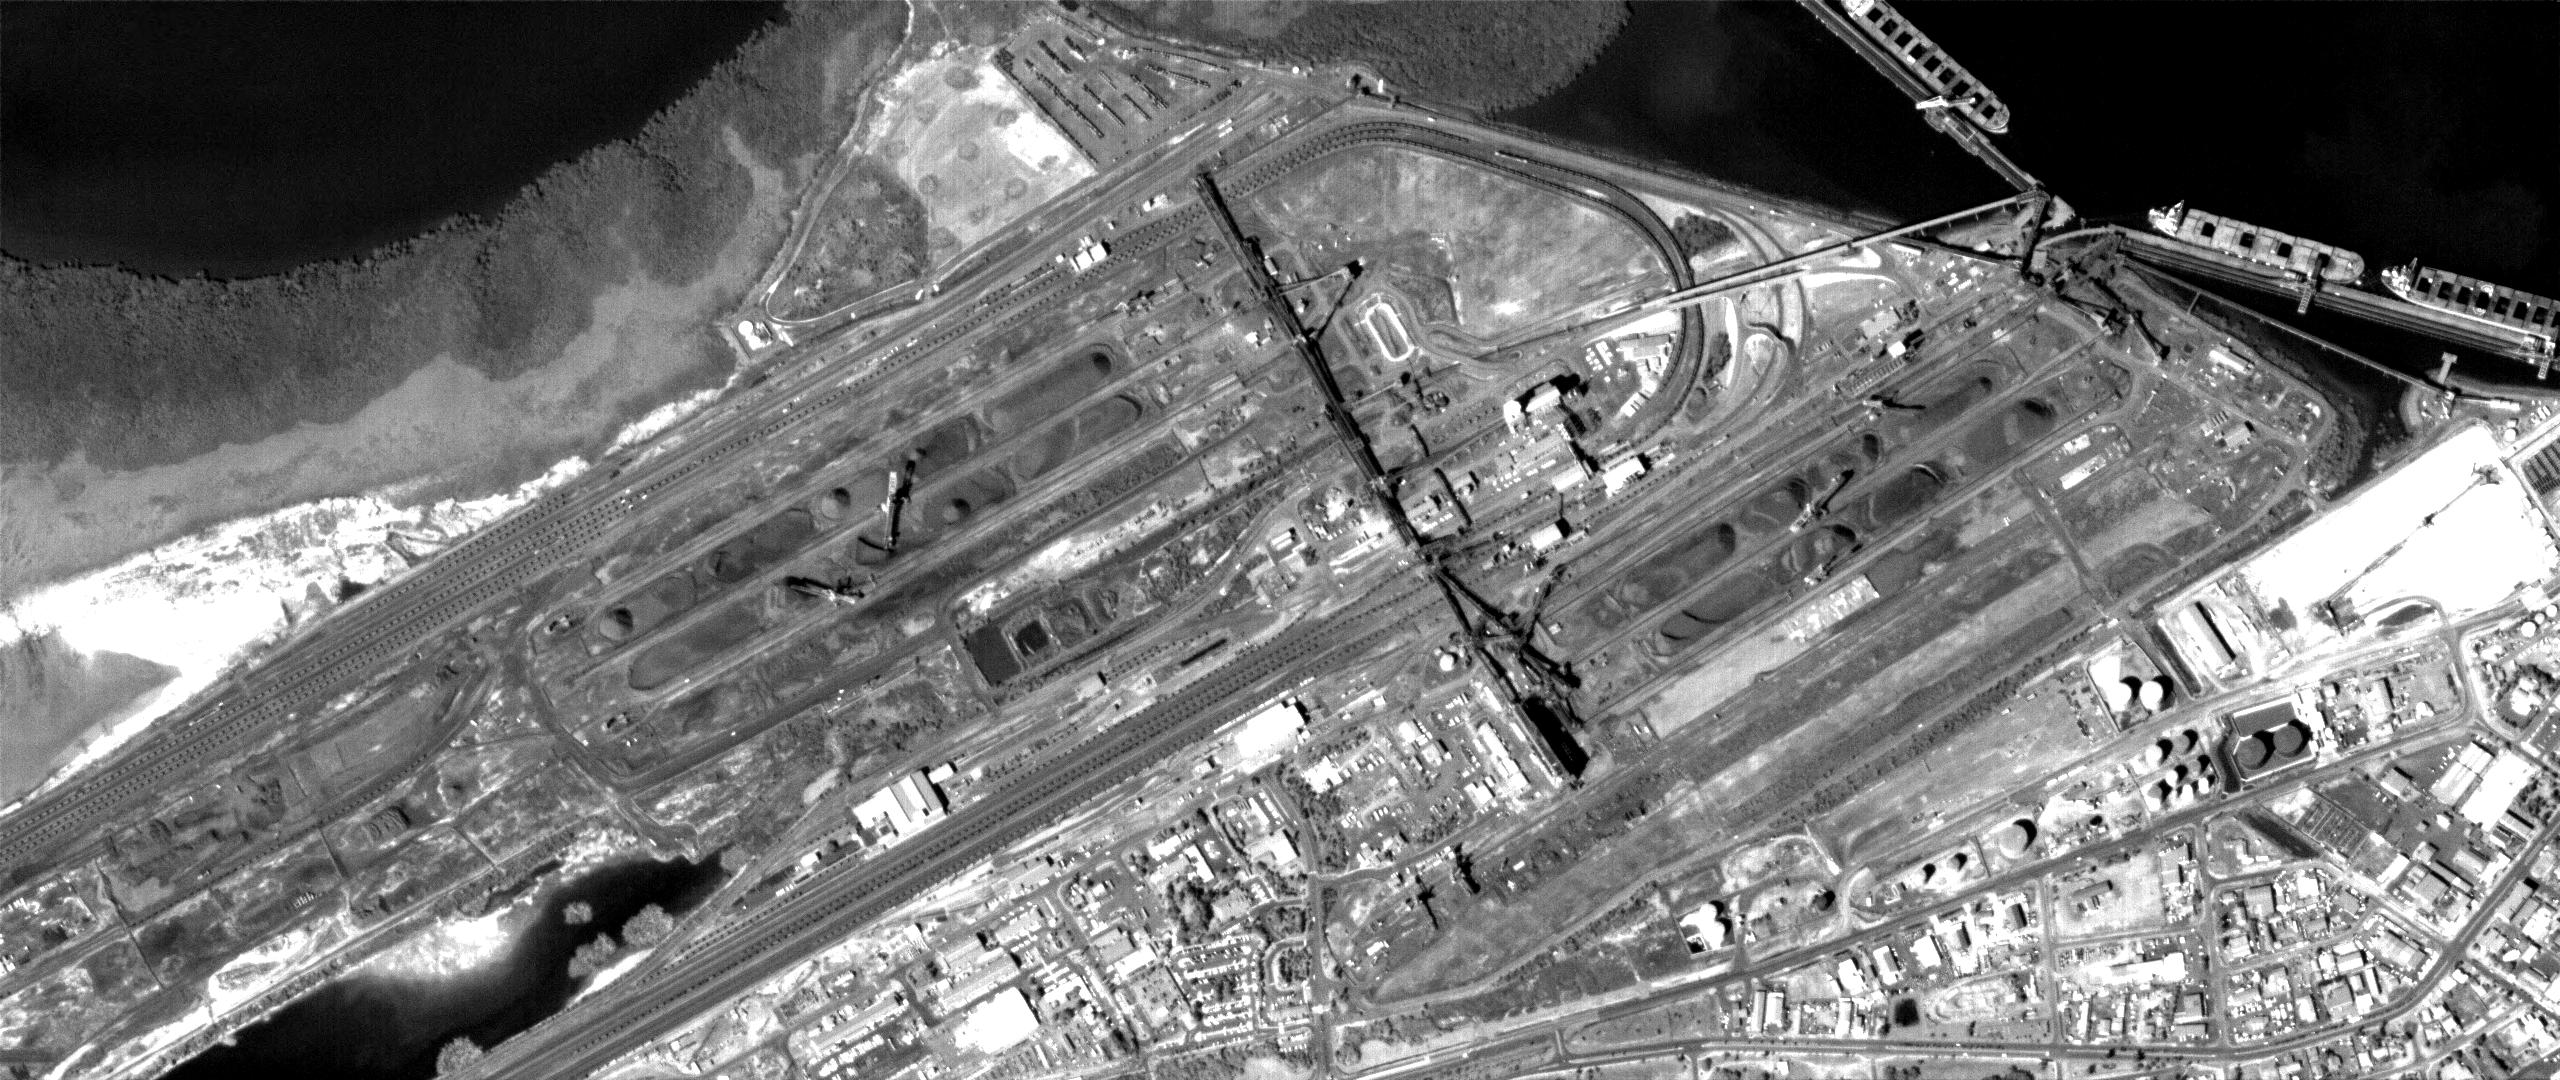

In [36]:
data_loader.display_images(images_name)

In [37]:
roi = {
    "x": 0,
    "y": 0,
    "w": 1000,
    "h": 1000
  }

Dimension:  (1000, 1000, 1)
Dimension:  (1000, 1000, 1)



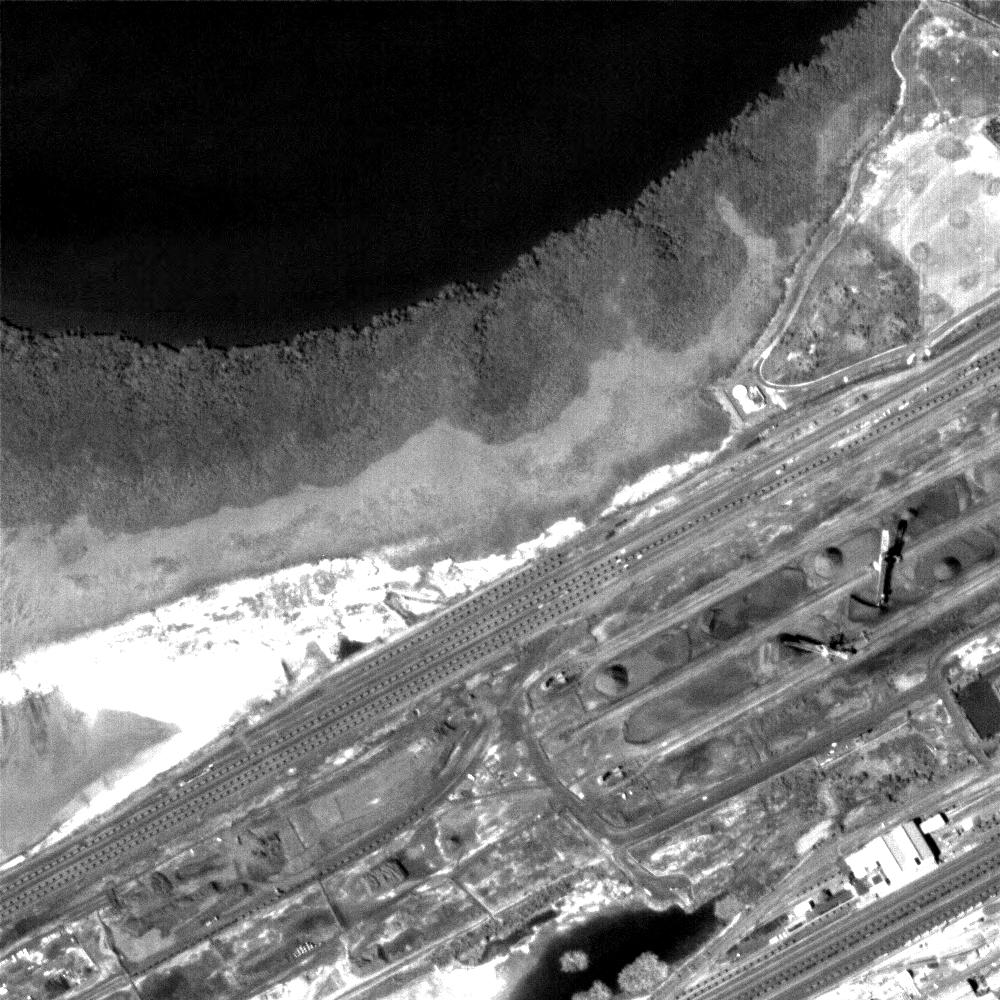
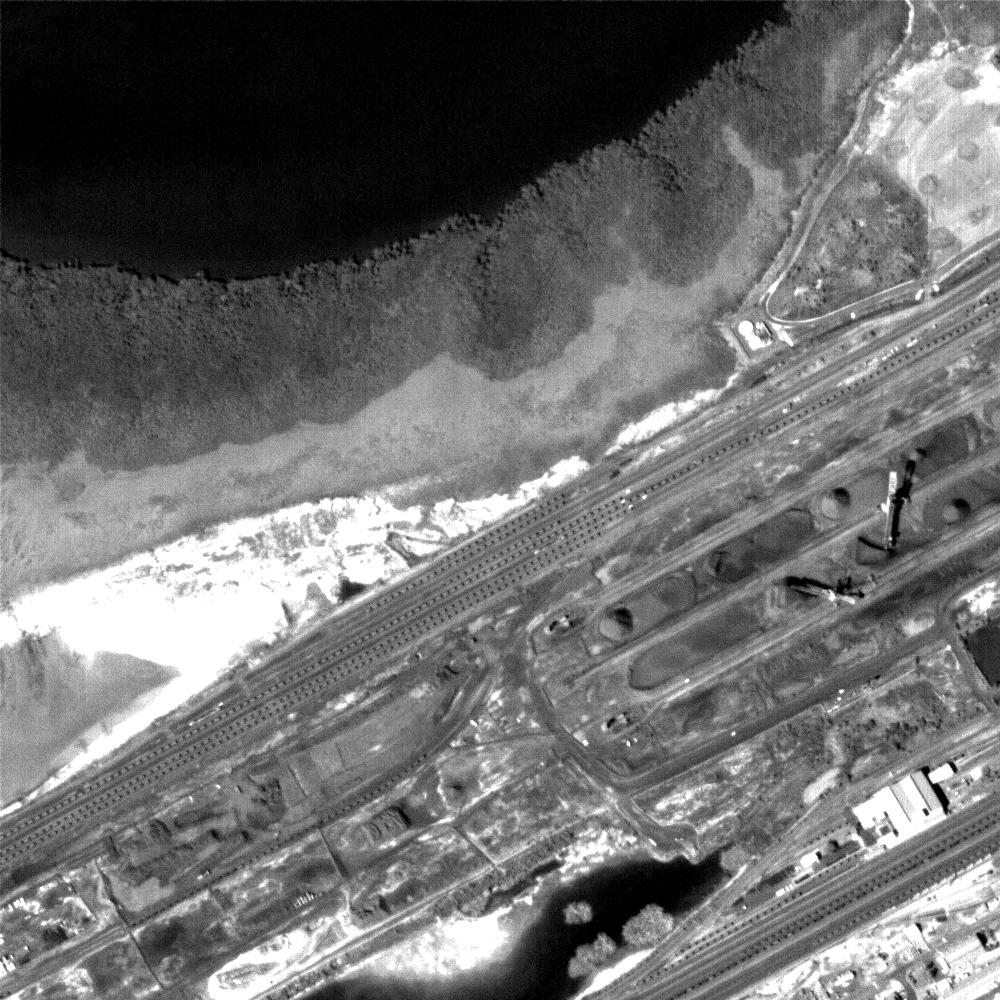

TypeError: 'NoneType' object is not iterable

In [38]:
l,g = data_loader.display_images(images_name, roi)

In [39]:
data_loader.write_json(images_name, roi)

# Execution of s2p on Plantet's data

In [43]:
!rm -rf output && cd .. && python3 s2p.py yaw_extension/config.json

out_dir is: /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output
tile size: 1000 1000
total number of tiles: 1 (1 x 1)

discarding masked tiles...
done 1 / 1 tiles
Elapsed time: 0:00:00.137880

correcting pointing locally...
correcting pointing on tile 0 0 pair 1...

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s02_20150507T020554Z/video_frames/s02_20150507T02055427Z.tif 0 0 1000 1000 --thresh-dog 0.013300 -o /tmp/s2p_cxeq7fo7.txt
0:00:01.224044

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../data/s02_20150507T020554Z/video_frames/s02_20150507T02055760Z.tif -37 -109 1013 1036 --thresh-dog 0.013300 -o /tmp/s2p_f07uvixv.txt
0:00:01.100297

RUN: matching /tmp/s2p_cxeq7fo7.txt /tmp/s2p_f07uvixv.txt -relative 0.600000 -o /tmp/s2p_e4y9iagp.txt -f "-0.7000752056690308 -0.05700340423666002 0.7093675955683442 0.0586765086766594 -32.18369954885975"
20 matches
0:00:00.493888

RUN: ransac fmn 1000 .3 7 /tmp/s2p_e4y9iagp.txt < /tmp/s2p_e4y9iagp.txt


In [44]:
tiles_path = visualization.get_tiles_path()
print(tiles_path)
tile_path = tiles_path[0]

['./output/tiles/row_0000000_height_1000/col_0000000_width_1000/pair_1']


# Retrieve computed values

In [45]:
im_list = visualization.get_images()
im1 = im_list[0]
im2 = im_list[1]

../data/s02_20150507T020554Z/video_frames/s02_20150507T02055427Z.tif
../data/s02_20150507T020554Z/video_frames/s02_20150507T02055760Z.tif


In [46]:
m = visualization.get_matches(tile_path)
F = visualization.get_affine_fundamental_matrix(tile_path)
A = visualization.get_correction_matrix(tile_path)
print(A)

[[ 1.          0.         -5.11790337]
 [ 0.          1.         -0.41671883]
 [ 0.          0.          1.        ]]


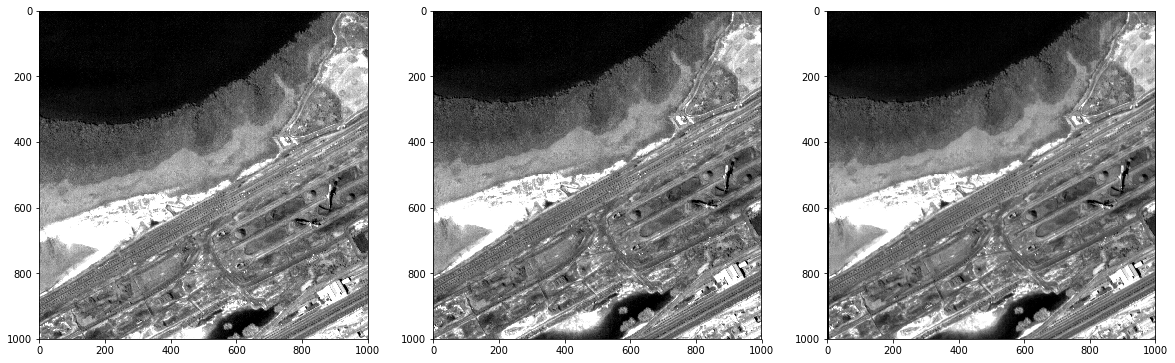

In [47]:
im2_corrected = visualization.visualize_transformation(im1, im2, A)

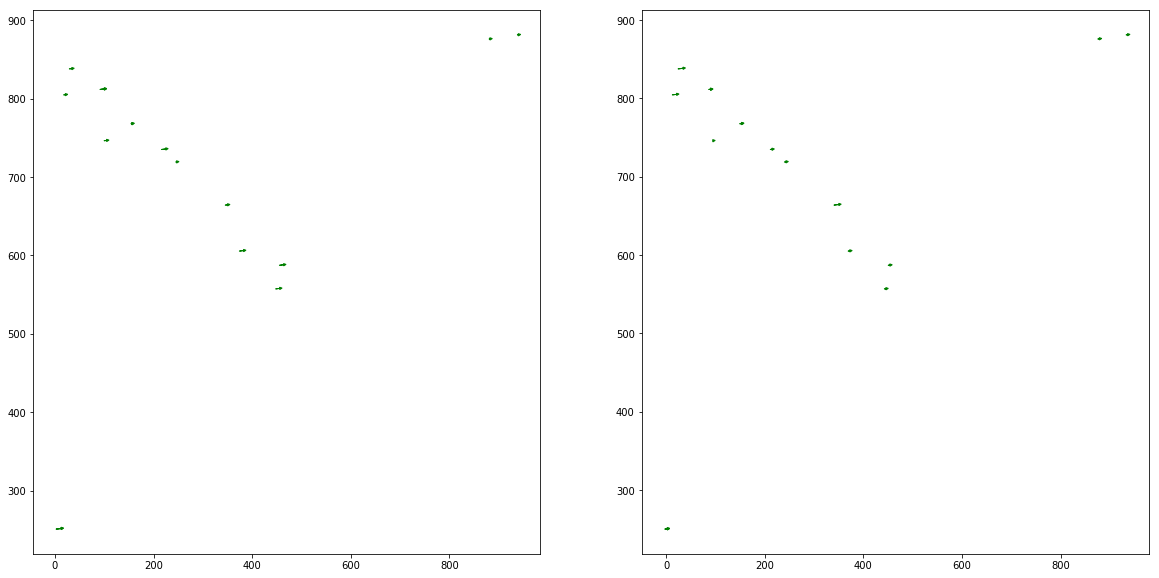

In [48]:
%matplotlib inline
e_2, e_3 = visualization.visualize_pointing_error(F, m, A)

In [49]:
print("error without pointing error correction:", e_2)
print("error with pointing error correction:", e_3)

error without pointing error correction: 99.34556224845885
error with pointing error correction: 76.28945884448281


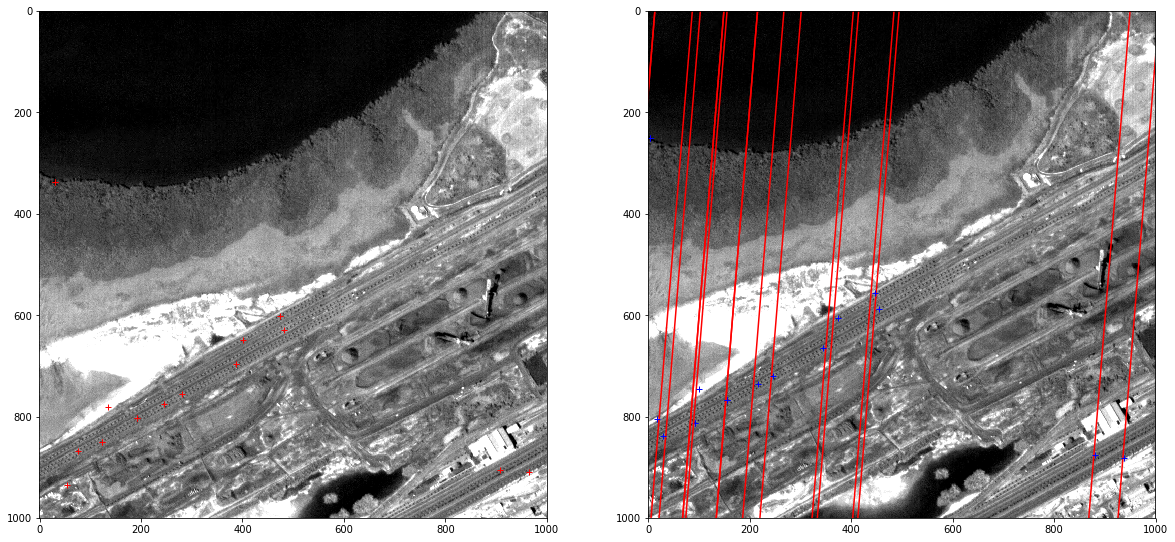

In [31]:
visualization.visualize_epipolar(im1, im2, F, m)

In [17]:
m

array([[481.227, 630.096, 455.222, 587.458],
       [386.606, 697.237, 345.273, 664.258],
       [280.406, 755.328, 244.836, 719.258],
       [245.184, 774.572, 216.193, 735.27 ],
       [122.186, 849.363,  91.615, 811.847],
       [122.186, 849.363,  91.615, 811.847],
       [ 74.861, 867.708,  29.2  , 838.11 ],
       [473.734, 600.765, 447.422, 557.286],
       [907.749, 905.211, 880.168, 876.277],
       [964.247, 909.774, 937.57 , 881.514],
       [400.979, 648.23 , 373.971, 605.567],
       [191.502, 802.584, 154.402, 768.112],
       [191.502, 802.584, 154.402, 768.112],
       [ 30.218, 337.276,   2.569, 250.745],
       [ 30.218, 337.276,   2.569, 250.745],
       [ 53.65 , 935.617,  17.564, 804.948],
       [134.13 , 780.107,  99.698, 746.412]])

In [87]:
a_ref = key + '/rectified_ref.tif'
a_sec = key + '/rectified_sec.tif'
ipytools.display_gallery([ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)), ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec))])

NameError: name 'key' is not defined

In [88]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)))

NameError: name 'a_ref' is not defined

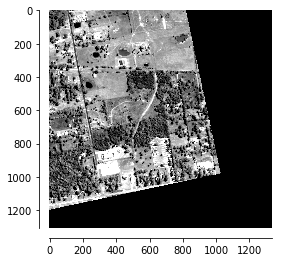

In [220]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec)))

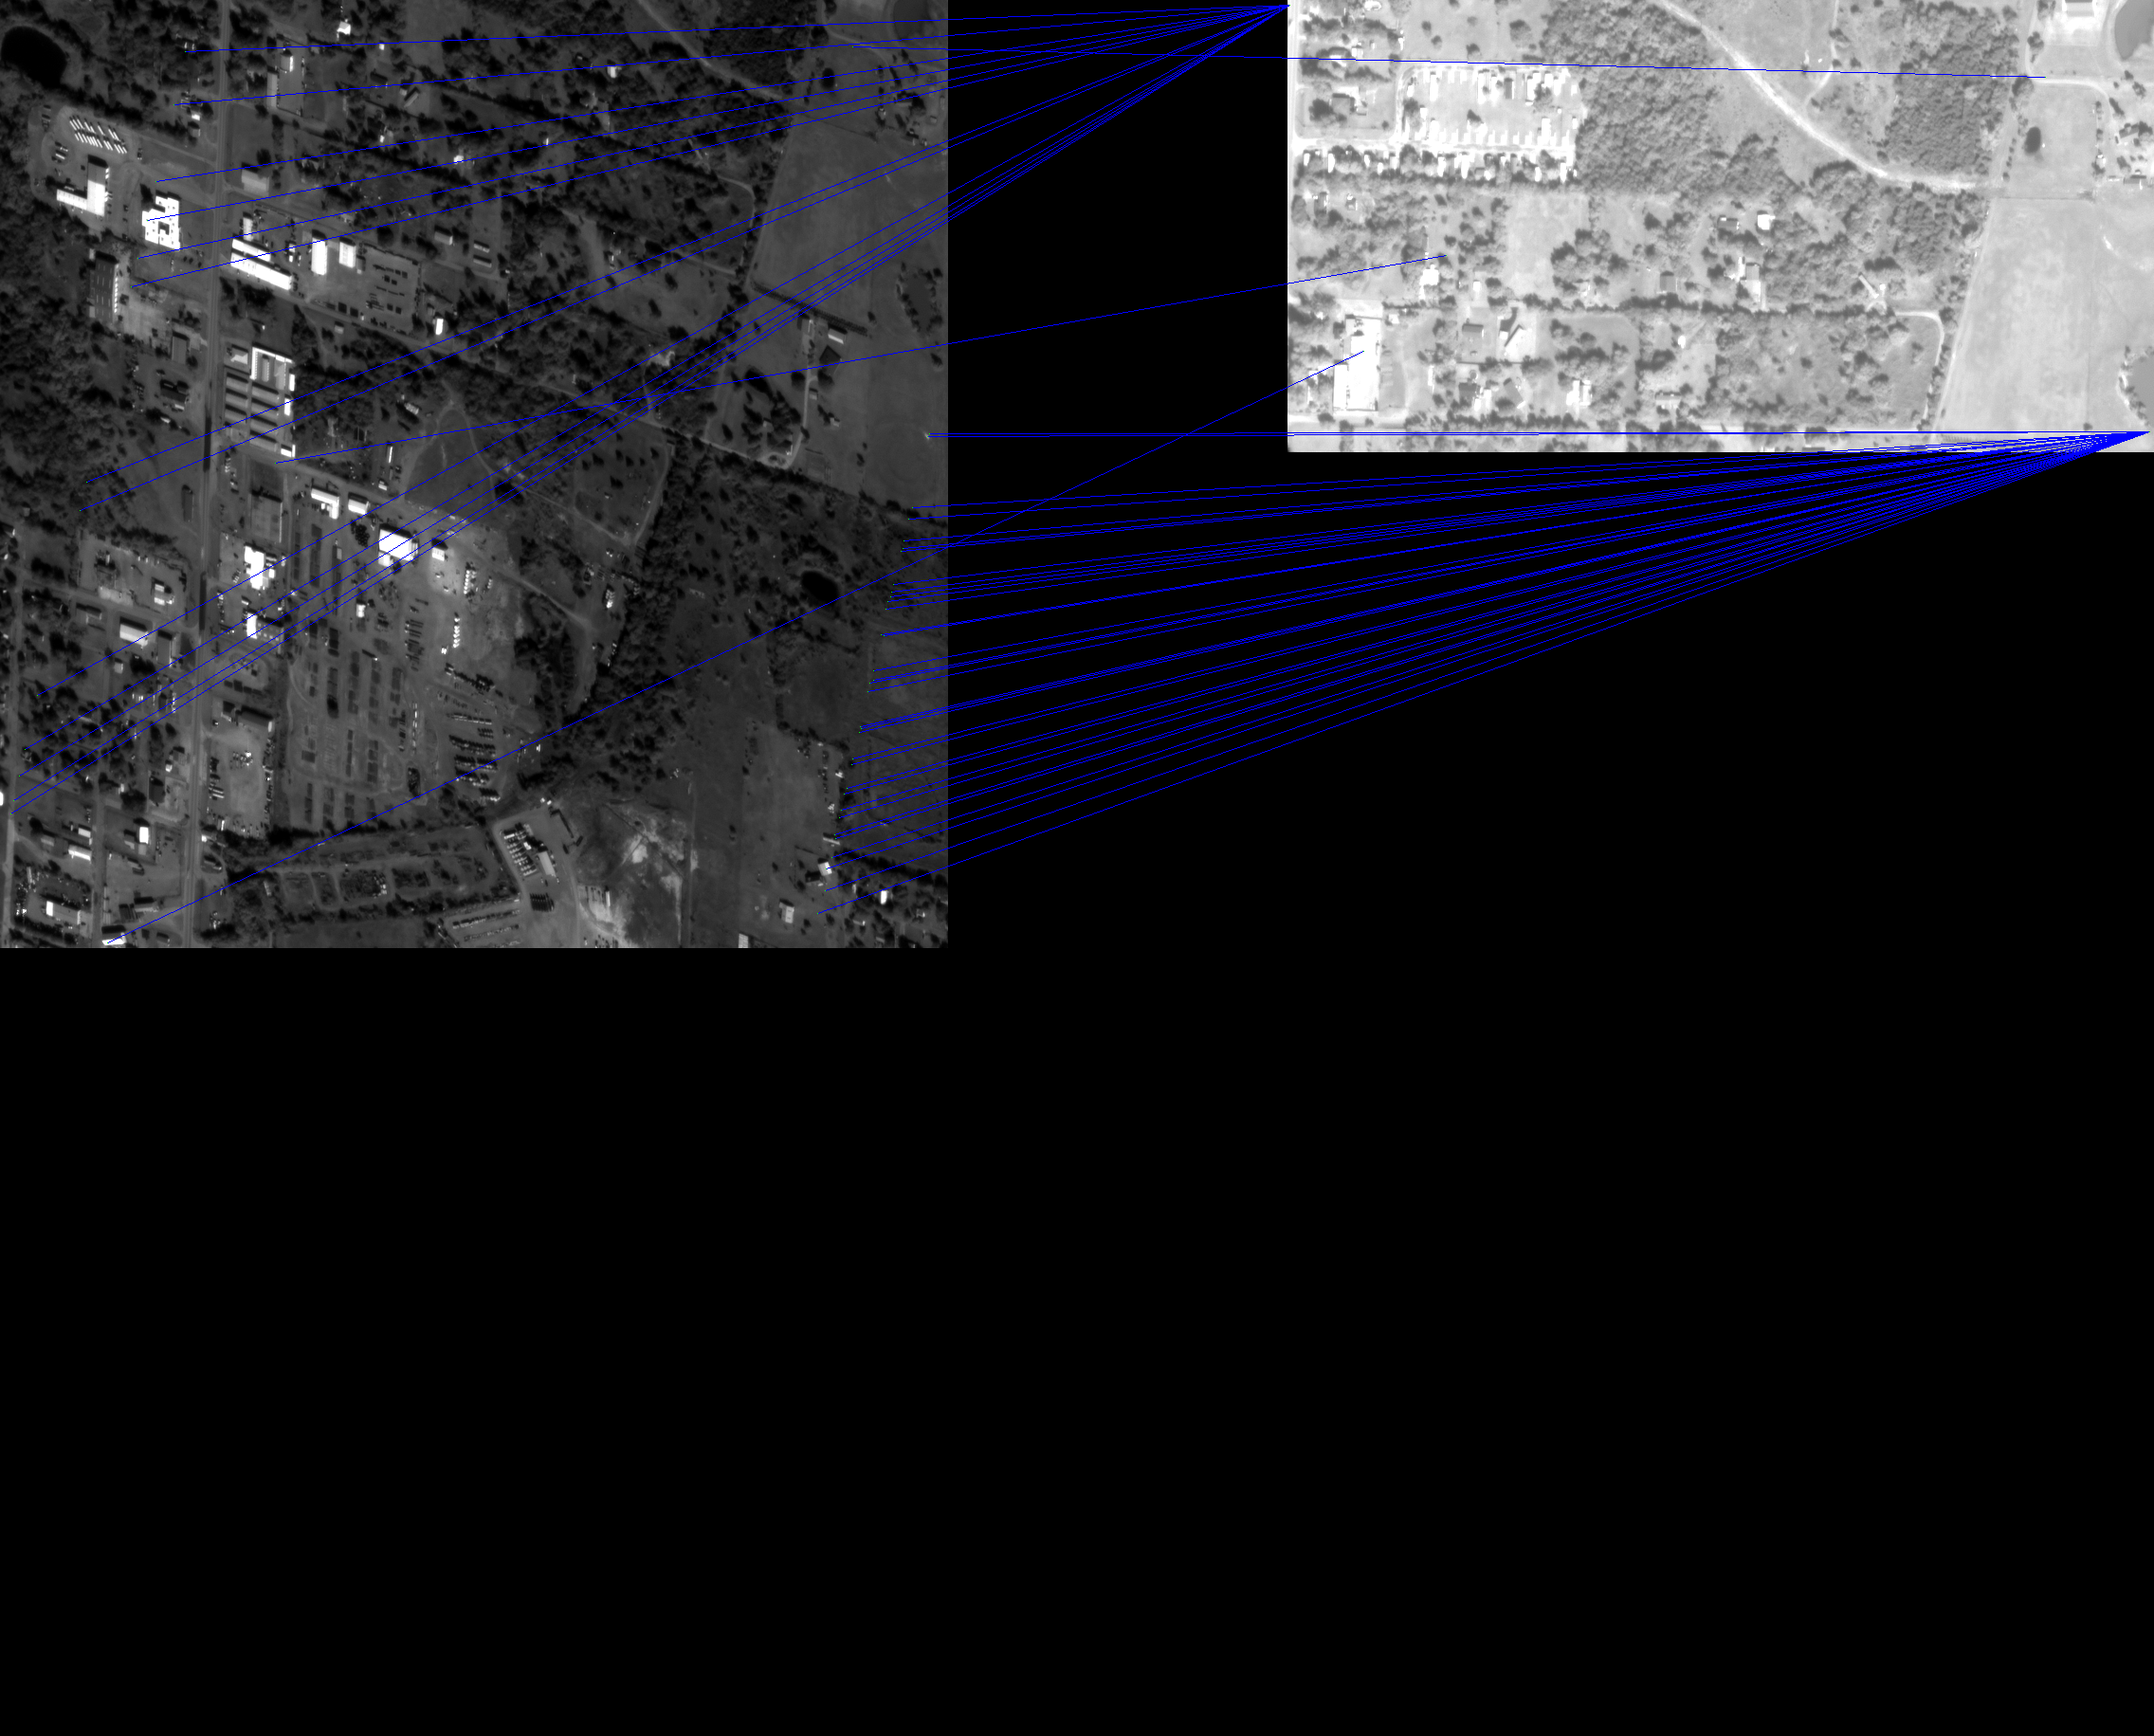

In [221]:
from IPython.display import Image
filename = key + '/sift_matches_pointing.png'
Image(filename=filename) 

In [106]:
expected_output = './output/s03_20161003T161107Z/dsm.tif'
a = readGTIFF(expected_output)

RasterioIOError: ./output/s03_20161003T161107Z/dsm.tif: No such file or directory

<IPython.core.display.Javascript object>


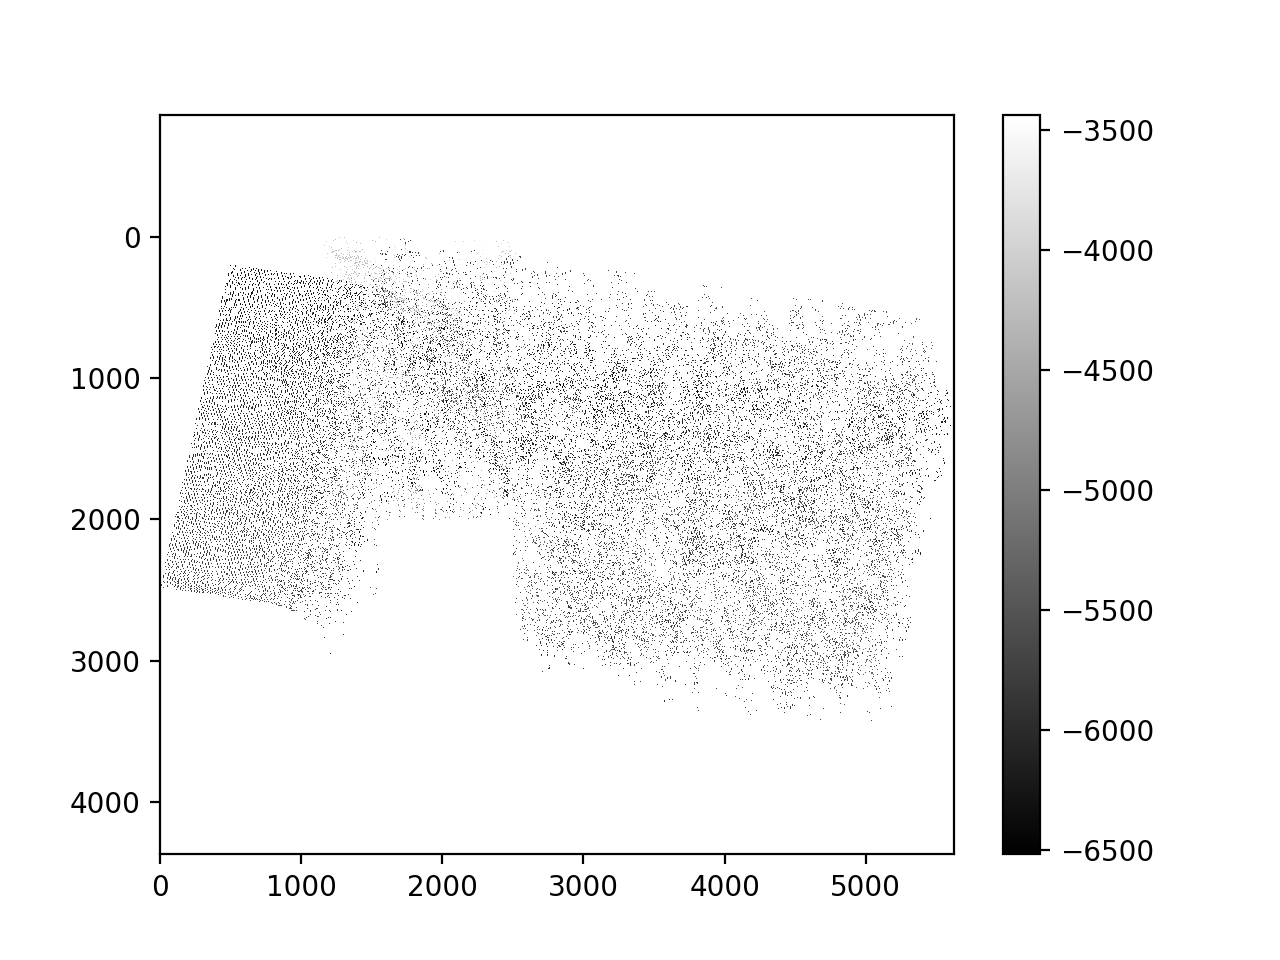

In [18]:
b = a#readGTIFF('/Users/juleskozolinsky/Projets/s2p/yaw_extension/output/s03_20161003T161107Z/tiles/row_0000000_height_500/col_0001000_width_500/dsm.tif')
display_imshow(b)